# Crop Suitability Analysis: Machine Learning for Agricultural Optimization

## Project Overview

This analysis identifies optimal soil conditions for crop growth by evaluating the predictive power of key soil nutrients (N, P, K) and pH. The goal is to understand how these soil characteristics influence crop suitability and to provide valuable insights for agricultural planning.

## Methodology

1. **Data Collection**:
   - Soil data was gathered for various agricultural fields, including concentrations of nitrogen (N), phosphorus (P), potassium (K), and pH levels.

2. **Feature Selection**:
   - Relevant features such as N, P, K, and pH were selected to determine the influence of these factors on crop growth.

3. **Logistic Regression Model**:
   - A logistic regression model was used to classify the crop suitability into binary categories (suitable vs. unsuitable).

4. **Performance Metrics**:
   - The **F1 score** was used as the primary evaluation metric to balance precision and recall for optimal crop suitability prediction.

## Results

The logistic regression model highlighted the following insights:
- Key soil nutrients (N, P, K) and pH levels are predictive of crop growth success.
- The optimal thresholds for each nutrient varied slightly depending on the crop type, but an overall pattern emerged that allowed for strong predictions of suitability.
- Using all features combined led to a **0.65** F1 score.


In [21]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Problem Statement

This analysis aims to identify the key soil characteristics that significantly influence crop suitability by addressing the following research question:

### **Can crop suitability be accurately predicted based on soil nutrient levels (N, P, K) and pH?**

By developing a predictive model using these soil properties, we can achieve

- **Optimised fertiliser application** - ensuring efficient nutrient distribution for better crop growth.  
- **Improved crop selection** - helping farmers choose the most appropriate crops based on soil composition.  
- **Improved land management** - supporting sustainable farming practices through data-driven decision making.  

Ultimately, this analysis contributes to more efficient use of resources, increased crop yields and sustainable farming practices.


In [22]:
path = kagglehub.dataset_download("raniajaberi/soil-measures")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/raniajaberi/soil-measures/versions/1


In [23]:
# Load the dataset
crops = pd.read_csv(os.path.join(path, "soil_measures.csv"))

crops.head(10)

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
5,69,37,42,7.073454,rice
6,69,55,38,5.700806,rice
7,94,53,40,5.718627,rice
8,89,54,38,6.685346,rice
9,68,58,38,6.336254,rice


## **Dataset Information**

The dataset used in this analysis is sourced from Kaggle and can be accessed via the following link: https://www.kaggle.com/datasets/raniajaberi/soil-measures.  

This precleaned dataset consists of soil measurements collected from various agricultural fields, providing insights into soil nutrient composition and its impact on crop suitability.  

### **Data Variables**
The dataset includes the following key variables:  

- **N:** Concentration of Nitrogen in the soil.  
- **P:** Concentration of Phosphorus in the soil.  
- **K:** Concentration of Potassium in the soil.  
- **pH:** Soil pH level.  
- **Crop:** The type of crop grown in the soil (*target variable*).  

These variables represent crucial soil characteristics that influence crop growth, helping to assess the suitability of soil for different crops.

## Model selection and evaluation

### **Model Selection: Logistic regression**

For this analysis, we selected **logistic regression** as the primary model for predicting crop suitability. This choice was based on the following considerations:

- **Binary classification task:** The target variable, *crop*, represents a classification problem (suitable vs. unsuitable). Logistic regression is well suited to such tasks, providing probabilities for each class.
- **Interpretability:** Logistic regression models allow us to understand the relationship between soil characteristics and crop suitability by examining the model coefficients.
- **Efficiency:** Logistic regression is computationally efficient, making it suitable for this data set and analysis.

### **Rating Metric: F1 Score**.

To assess model performance, we used the **F1 score** as the primary evaluation metric. The F1 score is the harmonic mean of **precision** and **recall** and provides a balanced measure of model accuracy, especially for unbalanced datasets.  

- **Precision:** Proportion of correctly predicted suitable crops out of all crops predicted as suitable (low false positives).  
- **Recall:** The proportion of suitable crops correctly predicted out of all suitable crops actually predicted (low false negatives).  

The **F1 score** balances these two aspects, ensuring that the model correctly identifies suitable crops while minimizing both false positives and false negatives.

---

## **Model Training and Evaluation**

The following steps were taken to train and evaluate the Logistic Regression model:

1. **Data Splitting:** The dataset was split into **training (70%)** and **testing (30%)** sets.
2. **Model Training:** The Logistic Regression model was trained on the training data.
3. **Prediction:** Predictions were generated using the trained model on the testing data.
4. **Evaluation:** The model’s performance was measured using the F1 score, comparing predicted vs. actual crop suitability.


In [24]:
feature_scores = {}

# Evaluate the specified features
for feature in ["N", "P", "K", "ph"]:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        crops[[feature]], crops['crop'], test_size=0.3, random_state=42
    )

    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a logistic regression classifier
    model = LogisticRegression(solver='lbfgs', random_state=42, class_weight='balanced')
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate the F1 score (using weighted average for multi-class)
    score = metrics.f1_score(y_test, y_pred, average='weighted')

    # Store the score in the dictionary
    feature_scores[feature] = score

# Identify the feature with the best score
best_feature = max(feature_scores, key=feature_scores.get)
best_score = feature_scores[best_feature]

# Create the best_predictive_feature dictionary
best_predictive_feature = {best_feature: best_score}

print(best_predictive_feature)

{'K': 0.20408385306241286}


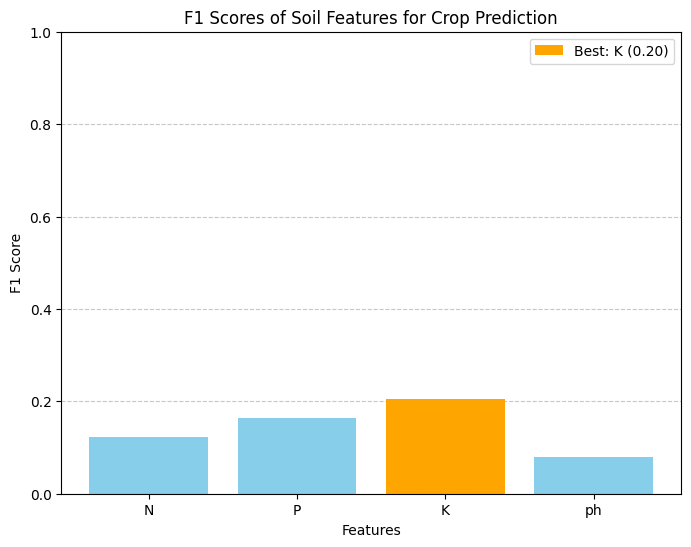

In [25]:
features = list(feature_scores.keys())
scores = list(feature_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(features, scores, color='skyblue')
plt.title('F1 Scores of Soil Features for Crop Prediction')
plt.xlabel('Features')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

best_idx = features.index(best_feature)
plt.bar(features[best_idx], scores[best_idx], color='orange', label=f"Best: {best_feature} ({best_score:.2f})")
plt.legend()

plt.show()

## **Results**

### **Initial Feature Evaluation**  
Each soil feature (**N, P, K, pH**) was individually tested using Logistic Regression to assess its predictive power. The F1 scores for each feature were compared to determine their relative importance in predicting crop suitability. Among these, **potassium (K) achieved the highest score of 0.2**, indicating that it has the strongest individual predictive influence on crop suitability.

### **Evaluating Combined Features**  
While evaluating features individually provides insights into their standalone predictive power, it does not account for potential **interactions** between soil characteristics. Certain features may complement each other, leading to **a stronger predictive model when combined**. To test this, we trained a Logistic Regression model using all soil features together.  

By incorporating multiple soil properties, the model can capture **complex relationships** that individual features might miss. This approach aims to improve prediction accuracy and provide a more holistic understanding of how soil composition affects crop suitability.


In [26]:
# Scale all features together
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crops[["N", "P", "K", "ph"]])

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, crops['crop'], test_size=0.3, random_state=42)

model = LogisticRegression(solver='lbfgs', random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = metrics.f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score with Scaled Features: {score}")

F1 Score with Scaled Features: 0.6522947476705456


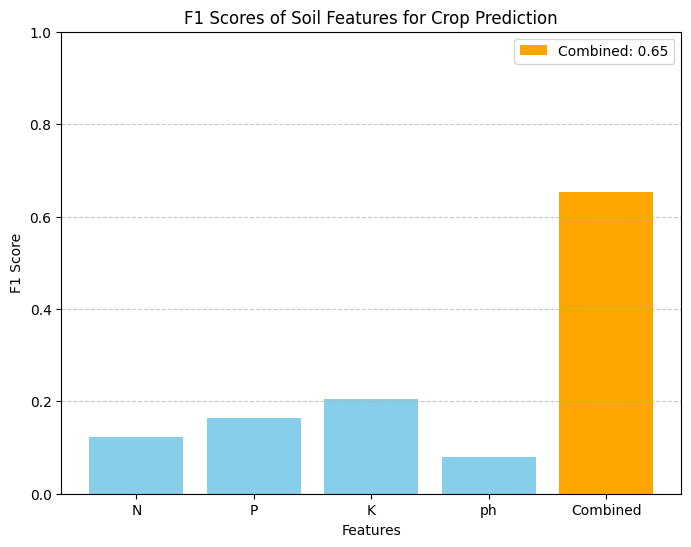

In [27]:
feature_scores['Combined'] = score

features = list(feature_scores.keys())
scores = list(feature_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(features, scores, color='skyblue')
plt.title('F1 Scores of Soil Features for Crop Prediction')
plt.xlabel('Features')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

combined_idx = features.index('Combined')
plt.bar(features[combined_idx], scores[combined_idx], color='orange',
        label=f"Combined: {scores[combined_idx]:.2f}")
plt.legend()

plt.show()

## **Results and Discussion**

- **Combined Feature Evaluation:** A Logistic Regression model was trained using all soil features together to evaluate their collective predictive power. The goal was to determine whether combining multiple variables enhances predictive accuracy compared to evaluating features in isolation.

- **Model Performance:** The Logistic Regression model achieved an **F1 score of 0.65** when using all features combined, significantly outperforming the highest individual feature score. This suggests that **considering multiple soil properties together provides a more comprehensive and accurate prediction of crop suitability**.


In [28]:
feature_importance = pd.DataFrame({'Feature': ['N', 'P', 'K', 'ph'],
                                   'Importance': model.coef_[0]})
print(feature_importance)

  Feature  Importance
0       N   -1.213588
1       P    3.782030
2       K    4.163719
3      ph   -1.060464


## **Overall Interpretation**  

- **Key Influencing Factors:**  
  - **Potassium (K)** and **Phosphorus (P)** are the most significant factors for crop suitability in this model. Higher levels of these nutrients **positively** influence crop growth and improve suitability.  

- **Negative Relationships:**  
  - **Nitrogen (N)** and **pH levels** show a **negative** correlation with crop suitability. Excessively high nitrogen levels or highly alkaline soil conditions (**high pH**) can **hinder crop growth**, potentially making the soil less suitable for certain crops.
  


## Model performance  

As a final step, we assess the performance of the model using a **confusion matrix**. The model achieves an **accuracy of 65.6%**, indicating that it correctly predicts crop suitability in about **two thirds of the cases**.  

### **Interpretation:**
- While an accuracy of **65.6%** suggests a **moderate level of predictive power**, it also highlights room for improvement.  
- The Confusion Matrix provides deeper insight into the strengths and weaknesses of the model by showing:  
  - **True Positives (TP):** Correctly predicted suitable crops.  
  - **True Negatives (TN):** Correctly predicted inappropriate crops.  
  - **False Positives (FP):** Crops incorrectly predicted as suitable (Type I error).  
  - **False Negatives (FN):** Crops incorrectly predicted as unsuitable (Type II error).  

### Key Takeaway:**
- The F1 score (0.65) balances precision and recall, indicating a **fair trade-off** between predicting suitability and avoiding misclassification.


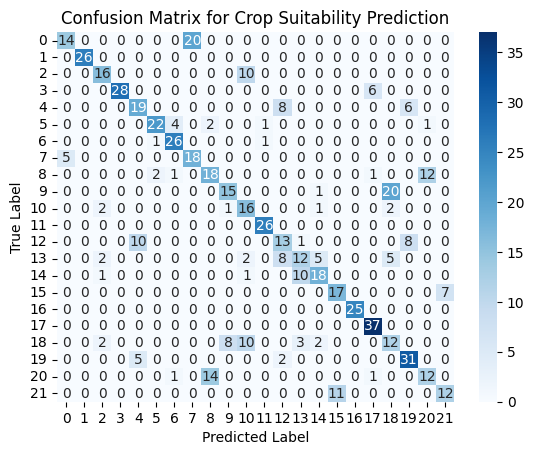

Accuracy: 0.656060606060606


In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Crop Suitability Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy: {accuracy}")